# Modelling
## 1. Prepare for Modelling
### 1.1. Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Data Split
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


In [2]:
# Disable Warnings
import warnings
warnings.filterwarnings("ignore")

### 1.2. Import data

In [3]:
# Substituir pelo df do feature selection 
all_data = pd.read_csv('data/processed/df_clustered.csv')

In [4]:
all_data.columns

Index(['Customer ID', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'City', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Tenure Category',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'New Customer', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Reason', 'Population', 'Engagement Score',
       'Gender_Male', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C',
       'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Typ

In [5]:
# Drop irrelevant variables for prediction (cluster) 
columns_to_remove=[col for col in all_data.columns if col.startswith('Cluster_')]
all_data.drop(columns=columns_to_remove, inplace=True, errors='ignore')

### 1.3. Feature Selection

In [6]:
# Import scenarios generated in feature selection
scenario1_td = pd.read_csv('data/processed/scenario1.csv')
scenario2_td = pd.read_csv('data/processed/scenario2.csv')

# Other scenarios created in this notebook

scenario3 = all_data[['Senior Citizen','Dependents','Referred a Friend','Internet Service','Internet Type_Fiber Optic','Online Security','Offer_Offer E',
                     'Offer_Offer A','Premium Tech Support','Unlimited Data','Contract_Month-to-Month','Paperless Billing','Payment Method_Credit Card', 'Churn Label']]

In [7]:
print(scenario1_td.columns)

Index(['Customer ID', 'Satisfaction Score', 'Churn Score',
       'Contract_Month-to-Month', 'Number of Referrals', 'Online Security',
       'Monthly Charge'],
      dtype='object')


In [8]:
# delete Churn Score from scenario 1
scenario1_td.drop(columns=['Churn Score'], inplace=True, errors='ignore')

### 1.4. Data Split
> Train-Test split<p>
> Train data in predictors (X) and target variable (y)

In [9]:
# Define the scenario to test
df = scenario1_td.copy()
df.set_index("Customer ID", inplace=True)

# Split
X_total = df
y_total = all_data[["Customer ID", "Churn Label"]]
y_total.set_index("Customer ID", inplace=True)

In [10]:
# Splitting the Data into Train and test with 20% test Data. Stratify dut to unbalance Dataset. (Only 27% Churn)
X_train_total, X_test, y_train_total, y_test = train_test_split(X_total, y_total, test_size=0.20, random_state=1, stratify=y_total)

In [11]:
# List to append the metrics of all the models
models =[]

## 2. Baseline X_train
### 2.1 Logistic Regression - Train and Validation Results

In [12]:
# Feature scaling - scenario 1 already scaled
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_train)

# Create StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model_LR = LogisticRegression()

# Initialize variables to store Validation results
train_accuracy_scores = []
train_f1_scores = []

# Initialize variables to store Validation results
val_accuracy_scores = []
val_f1_scores = []

# Perform k-fold cross-validation
for train_idx, val_idx in k_fold.split(X_train_total, y_train_total):
    X_train, X_val = X_train_total.iloc[train_idx], X_train_total.iloc[val_idx]
    y_train, y_val = y_train_total.iloc[train_idx], y_train_total.iloc[val_idx]

    # Train the model
    model_LR.fit(X_train, y_train)
    
    # Make predictions on the training set  - To check potential overfitting
    y_train_pred = model_LR.predict(X_train)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_train, y_train_pred)
    train_f1_scores.append(round(f1,3))

    # Make predictions on the validation set
    y_val_pred = model_LR.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_val, y_val_pred)
    val_f1_scores.append(round(f1,3))

#Training
# Print accuracy results
print("Training Accuracy:")
print(f'Cross-Validation Accuracy Scores: {train_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(train_accuracy_scores) / len(train_accuracy_scores),3)}\n')

# Print F1 results
print("Training F1 Score:")
print(f'Cross-Validation F1 Scores: {train_f1_scores}')
print(f'Mean F1: {round(sum(train_f1_scores) / len(train_f1_scores),3)}\n')

#Validation
# Print accuracy results
print("Validation Accuracy:")
print(f'Cross-Validation Accuracy Scores: {val_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(val_accuracy_scores) / len(val_accuracy_scores),3)}\n')

# Print F1 results
print("Validation F1 Score:")
print(f'Cross-Validation F1 Scores: {val_f1_scores}')
print(f'Mean F1: {round(sum(val_f1_scores) / len(val_f1_scores),3)}')

Training Accuracy:
Cross-Validation Accuracy Scores: [0.945, 0.946, 0.946, 0.947, 0.944]
Mean Accuracy: 0.946

Training F1 Score:
Cross-Validation F1 Scores: [0.892, 0.895, 0.895, 0.898, 0.892]
Mean F1: 0.894

Validation Accuracy:
Cross-Validation Accuracy Scores: [0.942, 0.94, 0.941, 0.946, 0.956]
Mean Accuracy: 0.945

Validation F1 Score:
Cross-Validation F1 Scores: [0.884, 0.883, 0.886, 0.895, 0.916]
Mean F1: 0.893


### 2.1 Logistic Regression - Test Results

In [13]:
# Fit Model to total Training Data
model_LR.fit(X_train_total, y_train_total)

# Make predictions on the Test set
y_test_pred = model_LR.predict(X_test)

# Evaluate the model on the Test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print Test Scores
print(f'Test Accuracy Scores: {round(accuracy,3)}')
print(f'Test F1 Scores: {round(f1,3)}')

Test Accuracy Scores: 0.952
Test F1 Scores: 0.906


In [14]:
lr = {"Model": "Logistic Regression", 
      "Accuracy Training": round(sum(train_accuracy_scores) / len(train_accuracy_scores),3),
      "Accuracy Validation": round(sum(val_accuracy_scores) / len(val_accuracy_scores),3),
      "Accuracy Test": round(accuracy,3),
      "F1 Training": round(sum(train_f1_scores) / len(train_f1_scores),3),
      "F1 Validation": round(sum(val_f1_scores) / len(val_f1_scores),3),
      "F1 Test": round(f1,3)}

models.append(lr)

### 2.2 Decision Tree - Train and Validation Results


In [15]:
# Create StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model_DT = DecisionTreeClassifier(max_depth=3)

# Initialize variables to store Validation results
train_accuracy_scores = []
train_f1_scores = []

# Initialize variables to store Validation results
val_accuracy_scores = []
val_f1_scores = []

# Perform k-fold cross-validation
for train_idx, val_idx in k_fold.split(X_train_total, y_train_total):
    X_train, X_val = X_train_total.iloc[train_idx], X_train_total.iloc[val_idx]
    y_train, y_val = y_train_total.iloc[train_idx], y_train_total.iloc[val_idx]

    # Train the model
    model_DT.fit(X_train, y_train)
    
    # Make predictions on the training set  - To check potential overfitting
    y_train_pred = model_DT.predict(X_train)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_train, y_train_pred)
    train_f1_scores.append(round(f1,3))

    # Make predictions on the validation set
    y_val_pred = model_DT.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_val, y_val_pred)
    val_f1_scores.append(round(f1,3))

#Training
# Print accuracy results
print("Training Accuracy:")
print(f'Cross-Validation Accuracy Scores: {train_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(train_accuracy_scores) / len(train_accuracy_scores),3)}\n')

# Print F1 results
print("Training F1 Score:")
print(f'Cross-Validation F1 Scores: {train_f1_scores}')
print(f'Mean F1: {round(sum(train_f1_scores) / len(train_f1_scores),3)}\n')

#Validation
# Print accuracy results
print("Validation Accuracy:")
print(f'Cross-Validation Accuracy Scores: {val_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(val_accuracy_scores) / len(val_accuracy_scores),3)}\n')

# Print F1 results
print("Validation F1 Score:")
print(f'Cross-Validation F1 Scores: {val_f1_scores}')
print(f'Mean F1: {round(sum(val_f1_scores) / len(val_f1_scores),3)}')

Training Accuracy:
Cross-Validation Accuracy Scores: [0.942, 0.939, 0.939, 0.938, 0.935]
Mean Accuracy: 0.939

Training F1 Score:
Cross-Validation F1 Scores: [0.877, 0.871, 0.871, 0.868, 0.86]
Mean F1: 0.869

Validation Accuracy:
Cross-Validation Accuracy Scores: [0.926, 0.937, 0.936, 0.941, 0.954]
Mean Accuracy: 0.939

Validation F1 Score:
Cross-Validation F1 Scores: [0.839, 0.865, 0.863, 0.874, 0.905]
Mean F1: 0.869


### 2.2 Decision Tree - Test Results

In [16]:
# Fit Model to total Training Data
model_DT.fit(X_train_total, y_train_total)

# Make predictions on the Test set
y_test_pred = model_DT.predict(X_test)

# Evaluate the model on the Test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print Test Scores
print(f'Test Accuracy Scores: {round(accuracy,3)}')
print(f'Test F1 Scores: {round(f1,3)}')

Test Accuracy Scores: 0.94
Test F1 Scores: 0.873


In [17]:
dt = {"Model": "Decision Tree", 
      "Accuracy Training": round(sum(train_accuracy_scores) / len(train_accuracy_scores),3),
      "Accuracy Validation": round(sum(val_accuracy_scores) / len(val_accuracy_scores),3),
      "Accuracy Test": round(accuracy,3),
      "F1 Training": round(sum(train_f1_scores) / len(train_f1_scores),3),
      "F1 Validation": round(sum(val_f1_scores) / len(val_f1_scores),3),
      "F1 Test": round(f1,3)}

models.append(dt)

### 2.3. Random Forest - Train and Validation Results


In [18]:
# Create StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model_RF = RandomForestClassifier(max_depth=3)

# Initialize variables to store Validation results
train_accuracy_scores = []
train_f1_scores = []

# Initialize variables to store Validation results
val_accuracy_scores = []
val_f1_scores = []

# Perform k-fold cross-validation
for train_idx, val_idx in k_fold.split(X_train_total, y_train_total):
    X_train, X_val = X_train_total.iloc[train_idx], X_train_total.iloc[val_idx]
    y_train, y_val = y_train_total.iloc[train_idx], y_train_total.iloc[val_idx]

    # Train the model
    model_DT.fit(X_train, y_train)
    
    # Make predictions on the training set  - To check potential overfitting
    y_train_pred = model_DT.predict(X_train)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_train, y_train_pred)
    train_f1_scores.append(round(f1,3))

    # Make predictions on the validation set
    y_val_pred = model_DT.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_val, y_val_pred)
    val_f1_scores.append(round(f1,3))

#Training
# Print accuracy results
print("Training Accuracy:")
print(f'Cross-Validation Accuracy Scores: {train_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(train_accuracy_scores) / len(train_accuracy_scores),3)}\n')

# Print F1 results
print("Training F1 Score:")
print(f'Cross-Validation F1 Scores: {train_f1_scores}')
print(f'Mean F1: {round(sum(train_f1_scores) / len(train_f1_scores),3)}\n')

#Validation
# Print accuracy results
print("Validation Accuracy:")
print(f'Cross-Validation Accuracy Scores: {val_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(val_accuracy_scores) / len(val_accuracy_scores),3)}\n')

# Print F1 results
print("Validation F1 Score:")
print(f'Cross-Validation F1 Scores: {val_f1_scores}')
print(f'Mean F1: {round(sum(val_f1_scores) / len(val_f1_scores),3)}')

Training Accuracy:
Cross-Validation Accuracy Scores: [0.942, 0.939, 0.939, 0.938, 0.935]
Mean Accuracy: 0.939

Training F1 Score:
Cross-Validation F1 Scores: [0.877, 0.871, 0.871, 0.868, 0.86]
Mean F1: 0.869

Validation Accuracy:
Cross-Validation Accuracy Scores: [0.926, 0.937, 0.936, 0.941, 0.954]
Mean Accuracy: 0.939

Validation F1 Score:
Cross-Validation F1 Scores: [0.839, 0.865, 0.863, 0.874, 0.905]
Mean F1: 0.869


### 2.3 Random Forest - Test Results

In [19]:
# Fit Model to total Training Data
model_RF.fit(X_train_total, y_train_total)

# Make predictions on the Test set
y_test_pred = model_RF.predict(X_test)

# Evaluate the model on the Test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print Test Scores
print(f'Test Accuracy Scores: {round(accuracy,3)}')
print(f'Test F1 Scores: {round(f1,3)}')

Test Accuracy Scores: 0.94
Test F1 Scores: 0.873


In [20]:
rf = {"Model": "Random Forest", 
      "Accuracy Training": round(sum(train_accuracy_scores) / len(train_accuracy_scores),3),
      "Accuracy Validation": round(sum(val_accuracy_scores) / len(val_accuracy_scores),3),
      "Accuracy Test": round(accuracy,3),
      "F1 Training": round(sum(train_f1_scores) / len(train_f1_scores),3),
      "F1 Validation": round(sum(val_f1_scores) / len(val_f1_scores),3),
      "F1 Test": round(f1,3)}

models.append(rf)

### 2.4 SVC - Train and Validation Results

In [21]:
# Create StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model_SVC = SVC()

# Initialize variables to store Validation results
train_accuracy_scores = []
train_f1_scores = []

# Initialize variables to store Validation results
val_accuracy_scores = []
val_f1_scores = []

# Perform k-fold cross-validation
for train_idx, val_idx in k_fold.split(X_train_total, y_train_total):
    X_train, X_val = X_train_total.iloc[train_idx], X_train_total.iloc[val_idx]
    y_train, y_val = y_train_total.iloc[train_idx], y_train_total.iloc[val_idx]

    # Train the model
    model_SVC.fit(X_train, y_train)
    
    # Make predictions on the training set  - To check potential overfitting
    y_train_pred = model_SVC.predict(X_train)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_train, y_train_pred)
    train_f1_scores.append(round(f1,3))

    # Make predictions on the validation set
    y_val_pred = model_SVC.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_val, y_val_pred)
    val_f1_scores.append(round(f1,3))

#Training
# Print accuracy results
print("Training Accuracy:")
print(f'Cross-Validation Accuracy Scores: {train_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(train_accuracy_scores) / len(train_accuracy_scores),3)}\n')

# Print F1 results
print("Training F1 Score:")
print(f'Cross-Validation F1 Scores: {train_f1_scores}')
print(f'Mean F1: {round(sum(train_f1_scores) / len(train_f1_scores),3)}\n')

#Validation
# Print accuracy results
print("Validation Accuracy:")
print(f'Cross-Validation Accuracy Scores: {val_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(val_accuracy_scores) / len(val_accuracy_scores),3)}\n')

# Print F1 results
print("Validation F1 Score:")
print(f'Cross-Validation F1 Scores: {val_f1_scores}')
print(f'Mean F1: {round(sum(val_f1_scores) / len(val_f1_scores),3)}')

Training Accuracy:
Cross-Validation Accuracy Scores: [0.948, 0.948, 0.95, 0.949, 0.946]
Mean Accuracy: 0.948

Training F1 Score:
Cross-Validation F1 Scores: [0.902, 0.903, 0.905, 0.904, 0.9]
Mean F1: 0.903

Validation Accuracy:
Cross-Validation Accuracy Scores: [0.952, 0.945, 0.946, 0.941, 0.955]
Mean Accuracy: 0.948

Validation F1 Score:
Cross-Validation F1 Scores: [0.907, 0.898, 0.897, 0.889, 0.916]
Mean F1: 0.901


### 2.4 SVC - Test Results

In [22]:
# Fit Model to total Training Data
model_SVC.fit(X_train_total, y_train_total)

# Make predictions on the Test set
y_test_pred = model_SVC.predict(X_test)

# Evaluate the model on the Test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print Test Scores
print(f'Test Accuracy Scores: {round(accuracy,3)}')
print(f'Test F1 Scores: {round(f1,3)}')

Test Accuracy Scores: 0.952
Test F1 Scores: 0.91


In [23]:
svcc = {"Model": "SVC", 
      "Accuracy Training": round(sum(train_accuracy_scores) / len(train_accuracy_scores),3),
      "Accuracy Validation": round(sum(val_accuracy_scores) / len(val_accuracy_scores),3),
      "Accuracy Test": round(accuracy,3),
      "F1 Training": round(sum(train_f1_scores) / len(train_f1_scores),3),
      "F1 Validation": round(sum(val_f1_scores) / len(val_f1_scores),3),
      "F1 Test": round(f1,3)}

models.append(svcc)

### 2.5 Gaussian - Train and Validation Results

In [24]:
# Create StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model_GA = GaussianNB()

# Initialize variables to store Validation results
train_accuracy_scores = []
train_f1_scores = []

# Initialize variables to store Validation results
val_accuracy_scores = []
val_f1_scores = []

# Perform k-fold cross-validation
for train_idx, val_idx in k_fold.split(X_train_total, y_train_total):
    X_train, X_val = X_train_total.iloc[train_idx], X_train_total.iloc[val_idx]
    y_train, y_val = y_train_total.iloc[train_idx], y_train_total.iloc[val_idx]

    # Train the model
    model_GA.fit(X_train, y_train)
    
    # Make predictions on the training set  - To check potential overfitting
    y_train_pred = model_GA.predict(X_train)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_train, y_train_pred)
    train_f1_scores.append(round(f1,3))

    # Make predictions on the validation set
    y_val_pred = model_GA.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_val, y_val_pred)
    val_f1_scores.append(round(f1,3))

#Training
# Print accuracy results
print("Training Accuracy:")
print(f'Cross-Validation Accuracy Scores: {train_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(train_accuracy_scores) / len(train_accuracy_scores),3)}\n')

# Print F1 results
print("Training F1 Score:")
print(f'Cross-Validation F1 Scores: {train_f1_scores}')
print(f'Mean F1: {round(sum(train_f1_scores) / len(train_f1_scores),3)}\n')

#Validation
# Print accuracy results
print("Validation Accuracy:")
print(f'Cross-Validation Accuracy Scores: {val_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(val_accuracy_scores) / len(val_accuracy_scores),3)}\n')

# Print F1 results
print("Validation F1 Score:")
print(f'Cross-Validation F1 Scores: {val_f1_scores}')
print(f'Mean F1: {round(sum(val_f1_scores) / len(val_f1_scores),3)}')

Training Accuracy:
Cross-Validation Accuracy Scores: [0.935, 0.934, 0.931, 0.936, 0.933]
Mean Accuracy: 0.934

Training F1 Score:
Cross-Validation F1 Scores: [0.879, 0.878, 0.874, 0.882, 0.876]
Mean F1: 0.878

Validation Accuracy:
Cross-Validation Accuracy Scores: [0.937, 0.93, 0.938, 0.929, 0.933]
Mean Accuracy: 0.933

Validation F1 Score:
Cross-Validation F1 Scores: [0.883, 0.871, 0.885, 0.869, 0.877]
Mean F1: 0.877


### 2.5 Gaussian - Test Results

In [25]:
# Fit Model to total Training Data
model_GA.fit(X_train_total, y_train_total)

# Make predictions on the Test set
y_test_pred = model_GA.predict(X_test)

# Evaluate the model on the Test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print Test Scores
print(f'Test Accuracy Scores: {round(accuracy,3)}')
print(f'Test F1 Scores: {round(f1,3)}')

Test Accuracy Scores: 0.938
Test F1 Scores: 0.887


In [26]:
gaussian = {"Model": "Gaussian", 
      "Accuracy Training": round(sum(train_accuracy_scores) / len(train_accuracy_scores),3),
      "Accuracy Validation": round(sum(val_accuracy_scores) / len(val_accuracy_scores),3),
      "Accuracy Test": round(accuracy,3),
      "F1 Training": round(sum(train_f1_scores) / len(train_f1_scores),3),
      "F1 Validation": round(sum(val_f1_scores) / len(val_f1_scores),3),
      "F1 Test": round(f1,3)}

models.append(gaussian)

### 2.6 KNN - Train and Validation Results

In [27]:
# Create StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model_KNN = KNeighborsClassifier()

# Initialize variables to store Validation results
train_accuracy_scores = []
train_f1_scores = []

# Initialize variables to store Validation results
val_accuracy_scores = []
val_f1_scores = []

# Perform k-fold cross-validation
for train_idx, val_idx in k_fold.split(X_train_total, y_train_total):
    X_train, X_val = X_train_total.iloc[train_idx], X_train_total.iloc[val_idx]
    y_train, y_val = y_train_total.iloc[train_idx], y_train_total.iloc[val_idx]

    # Train the model
    model_KNN.fit(X_train, y_train)
    
    # Make predictions on the training set  - To check potential overfitting
    y_train_pred = model_KNN.predict(X_train)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_train, y_train_pred)
    train_f1_scores.append(round(f1,3))

    # Make predictions on the validation set
    y_val_pred = model_KNN.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_val, y_val_pred)
    val_f1_scores.append(round(f1,3))

#Training
# Print accuracy results
print("Training Accuracy:")
print(f'Cross-Validation Accuracy Scores: {train_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(train_accuracy_scores) / len(train_accuracy_scores),3)}\n')

# Print F1 results
print("Training F1 Score:")
print(f'Cross-Validation F1 Scores: {train_f1_scores}')
print(f'Mean F1: {round(sum(train_f1_scores) / len(train_f1_scores),3)}\n')

#Validation
# Print accuracy results
print("Validation Accuracy:")
print(f'Cross-Validation Accuracy Scores: {val_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(val_accuracy_scores) / len(val_accuracy_scores),3)}\n')

# Print F1 results
print("Validation F1 Score:")
print(f'Cross-Validation F1 Scores: {val_f1_scores}')
print(f'Mean F1: {round(sum(val_f1_scores) / len(val_f1_scores),3)}')

Training Accuracy:
Cross-Validation Accuracy Scores: [0.962, 0.962, 0.962, 0.963, 0.96]
Mean Accuracy: 0.962

Training F1 Score:
Cross-Validation F1 Scores: [0.927, 0.928, 0.927, 0.929, 0.923]
Mean F1: 0.927

Validation Accuracy:
Cross-Validation Accuracy Scores: [0.943, 0.941, 0.941, 0.937, 0.948]
Mean Accuracy: 0.942

Validation F1 Score:
Cross-Validation F1 Scores: [0.888, 0.887, 0.887, 0.878, 0.902]
Mean F1: 0.888


### 2.6 KNN - Test Results

In [28]:
# Fit Model to total Training Data
model_KNN.fit(X_train_total, y_train_total)

# Make predictions on the Test set
y_test_pred = model_KNN.predict(X_test)

# Evaluate the model on the Test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print Test Scores
print(f'Test Accuracy Scores: {round(accuracy,3)}')
print(f'Test F1 Scores: {round(f1,3)}')

Test Accuracy Scores: 0.943
Test F1 Scores: 0.891


In [29]:
knn = {"Model": "KNN", 
      "Accuracy Training": round(sum(train_accuracy_scores) / len(train_accuracy_scores),3),
      "Accuracy Validation": round(sum(val_accuracy_scores) / len(val_accuracy_scores),3),
      "Accuracy Test": round(accuracy,3),
      "F1 Training": round(sum(train_f1_scores) / len(train_f1_scores),3),
      "F1 Validation": round(sum(val_f1_scores) / len(val_f1_scores),3),
      "F1 Test": round(f1,3)}

models.append(knn)

### 2.7 Gradient Boosting - Train and Validation Results

In [30]:
# Create StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model_GB = GradientBoostingClassifier()

# Initialize variables to store Validation results
train_accuracy_scores = []
train_f1_scores = []

# Initialize variables to store Validation results
val_accuracy_scores = []
val_f1_scores = []

# Perform k-fold cross-validation
for train_idx, val_idx in k_fold.split(X_train_total, y_train_total):
    X_train, X_val = X_train_total.iloc[train_idx], X_train_total.iloc[val_idx]
    y_train, y_val = y_train_total.iloc[train_idx], y_train_total.iloc[val_idx]

    # Train the model
    model_GB.fit(X_train, y_train)
    
    # Make predictions on the training set  - To check potential overfitting
    y_train_pred = model_GB.predict(X_train)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_train, y_train_pred)
    train_f1_scores.append(round(f1,3))

    # Make predictions on the validation set
    y_val_pred = model_GB.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_val, y_val_pred)
    val_f1_scores.append(round(f1,3))

#Training
# Print accuracy results
print("Training Accuracy:")
print(f'Cross-Validation Accuracy Scores: {train_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(train_accuracy_scores) / len(train_accuracy_scores),3)}\n')

# Print F1 results
print("Training F1 Score:")
print(f'Cross-Validation F1 Scores: {train_f1_scores}')
print(f'Mean F1: {round(sum(train_f1_scores) / len(train_f1_scores),3)}\n')

#Validation
# Print accuracy results
print("Validation Accuracy:")
print(f'Cross-Validation Accuracy Scores: {val_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(val_accuracy_scores) / len(val_accuracy_scores),3)}\n')

# Print F1 results
print("Validation F1 Score:")
print(f'Cross-Validation F1 Scores: {val_f1_scores}')
print(f'Mean F1: {round(sum(val_f1_scores) / len(val_f1_scores),3)}')

Training Accuracy:
Cross-Validation Accuracy Scores: [0.958, 0.957, 0.957, 0.96, 0.955]
Mean Accuracy: 0.957

Training F1 Score:
Cross-Validation F1 Scores: [0.921, 0.917, 0.917, 0.924, 0.914]
Mean F1: 0.919

Validation Accuracy:
Cross-Validation Accuracy Scores: [0.948, 0.949, 0.948, 0.943, 0.957]
Mean Accuracy: 0.949

Validation F1 Score:
Cross-Validation F1 Scores: [0.898, 0.903, 0.899, 0.89, 0.92]
Mean F1: 0.902


### 2.7 Gradient Boosting - Test Results

In [31]:
# Fit Model to total Training Data
model_GB.fit(X_train_total, y_train_total)

# Make predictions on the Test set
y_test_pred = model_GB.predict(X_test)

# Evaluate the model on the Test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print Test Scores
print(f'Test Accuracy Scores: {round(accuracy,3)}')
print(f'Test F1 Scores: {round(f1,3)}')

Test Accuracy Scores: 0.955
Test F1 Scores: 0.913


In [32]:
gb = {"Model": "Gradient Boosting", 
      "Accuracy Training": round(sum(train_accuracy_scores) / len(train_accuracy_scores),3),
      "Accuracy Validation": round(sum(val_accuracy_scores) / len(val_accuracy_scores),3),
      "Accuracy Test": round(accuracy,3),
      "F1 Training": round(sum(train_f1_scores) / len(train_f1_scores),3),
      "F1 Validation": round(sum(val_f1_scores) / len(val_f1_scores),3),
      "F1 Test": round(f1,3)}

models.append(gb)

### 2.8 MLP - Train and Validation Results

In [33]:
# Create StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model_MLP = MLPClassifier()

# Initialize variables to store Validation results
train_accuracy_scores = []
train_f1_scores = []

# Initialize variables to store Validation results
val_accuracy_scores = []
val_f1_scores = []

# Perform k-fold cross-validation
for train_idx, val_idx in k_fold.split(X_train_total, y_train_total):
    X_train, X_val = X_train_total.iloc[train_idx], X_train_total.iloc[val_idx]
    y_train, y_val = y_train_total.iloc[train_idx], y_train_total.iloc[val_idx]

    # Train the model
    model_MLP.fit(X_train, y_train)
    
    # Make predictions on the training set  - To check potential overfitting
    y_train_pred = model_MLP.predict(X_train)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_train, y_train_pred)
    train_f1_scores.append(round(f1,3))

    # Make predictions on the validation set
    y_val_pred = model_MLP.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracy_scores.append(round(accuracy,3))
    
    #F1 Score 
    f1 = f1_score(y_val, y_val_pred)
    val_f1_scores.append(round(f1,3))

#Training
# Print accuracy results
print("Training Accuracy:")
print(f'Cross-Validation Accuracy Scores: {train_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(train_accuracy_scores) / len(train_accuracy_scores),3)}\n')

# Print F1 results
print("Training F1 Score:")
print(f'Cross-Validation F1 Scores: {train_f1_scores}')
print(f'Mean F1: {round(sum(train_f1_scores) / len(train_f1_scores),3)}\n')

#Validation
# Print accuracy results
print("Validation Accuracy:")
print(f'Cross-Validation Accuracy Scores: {val_accuracy_scores}')
print(f'Mean Accuracy: {round(sum(val_accuracy_scores) / len(val_accuracy_scores),3)}\n')

# Print F1 results
print("Validation F1 Score:")
print(f'Cross-Validation F1 Scores: {val_f1_scores}')
print(f'Mean F1: {round(sum(val_f1_scores) / len(val_f1_scores),3)}')

Training Accuracy:
Cross-Validation Accuracy Scores: [0.949, 0.949, 0.949, 0.949, 0.945]
Mean Accuracy: 0.948

Training F1 Score:
Cross-Validation F1 Scores: [0.901, 0.9, 0.903, 0.904, 0.895]
Mean F1: 0.901

Validation Accuracy:
Cross-Validation Accuracy Scores: [0.949, 0.95, 0.946, 0.946, 0.959]
Mean Accuracy: 0.95

Validation F1 Score:
Cross-Validation F1 Scores: [0.898, 0.903, 0.897, 0.897, 0.923]
Mean F1: 0.904


### 2.8 MLP - Test Results

In [34]:
# Fit Model to total Training Data
model_MLP.fit(X_train_total, y_train_total)

# Make predictions on the Test set
y_test_pred = model_MLP.predict(X_test)

# Evaluate the model on the Test set
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print Test Scores
print(f'Test Accuracy Scores: {round(accuracy,3)}')
print(f'Test F1 Scores: {round(f1,3)}')

Test Accuracy Scores: 0.95
Test F1 Scores: 0.904


In [35]:
mlp = {"Model": "MLP", 
      "Accuracy Training": round(sum(train_accuracy_scores) / len(train_accuracy_scores),3),
      "Accuracy Validation": round(sum(val_accuracy_scores) / len(val_accuracy_scores),3),
      "Accuracy Test": round(accuracy,3),
      "F1 Training": round(sum(train_f1_scores) / len(train_f1_scores),3),
      "F1 Validation": round(sum(val_f1_scores) / len(val_f1_scores),3),
      "F1 Test": round(f1,3)}

models.append(mlp)

In [36]:
# Coonvert List of Models Metrics to DF
models_df = pd.DataFrame(models)

In [37]:
models_df

,Model,Accuracy Training,Accuracy Validation,Accuracy Test,F1 Training,F1 Validation,F1 Test
0,Logistic Regression,0.946,0.945,0.952,0.894,0.893,0.906
1,Decision Tree,0.939,0.939,0.940,0.869,0.869,0.873
2,Random Forest,0.939,0.939,0.940,0.869,0.869,0.873
3,SVC,0.948,0.948,0.952,0.903,0.901,0.910
4,Gaussian,0.934,0.933,0.938,0.878,0.877,0.887
5,KNN,0.962,0.942,0.943,0.927,0.888,0.891
6,Gradient Boosting,0.957,0.949,0.955,0.919,0.902,0.913
7,MLP,0.948,0.950,0.950,0.901,0.904,0.904


> Decision Trees:
Intuitive and easy to understand.
Can capture complex relationships in the data.

> Random Forest:
Ensemble method built on decision trees.
Generally more robust and accurate than individual trees.

> Support Vector Machines (SVM):
Effective in high-dimensional spaces.
Works well when there is a clear margin of separation between classes.

> Naive Bayes:
Assumes independence between features.
Fast and can perform well on certain types of data.

> K-Nearest Neighbors (KNN):
Instance-based learning.
Simple and easy to understand.

> Gradient Boosting (e.g., XGBoost, LightGBM, AdaBoost):
Builds a strong predictive model by combining weak models.
Often produces very accurate results.

## 3. Model Optimization


### 3.1 RandomSearch - Gradient Boosting

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Create the Gradient Boosting model (without specifying hyperparameters)
gb_model = GradientBoostingClassifier()

# Define the parameter space for random search
parameter_space_random = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': np.arange(0.1, 1.1, 0.1),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=parameter_space_random,
                                    scoring='f1', cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_total, y_train_total)

# Print the best parameters
#print("Best Parameters: ", random_search.best_params_)

# Extract the best parameters and their scores from RandomizedSearchCV
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

# Create a DataFrame to store the results
results_rs_gb = pd.DataFrame(columns=['Parameter', 'Best Result'])

# Add the best parameters and scores to the DataFrame
for param, value in best_params_random.items():
    results_rs_gb = pd.concat([results_rs_gb, pd.DataFrame({'Parameter': [param], 'Best Result': [value]})])

# Add the best score to the DataFrame
results_rs_gb = pd.concat([results_rs_gb, pd.DataFrame({'Parameter': ['Best Score'], 'Best Result': [best_score_random]})])

# Display the results DataFrame
results_rs_gb




,Parameter,Best Result
0,subsample,0.5
0,n_estimators,50.0
0,min_samples_split,10.0
0,min_samples_leaf,1.0
0,max_features,sqrt
0,max_depth,3
0,learning_rate,0.1
0,Best Score,0.904799


### 3.2 GridSearch - Gradient Boosting

In [39]:
# Create the Gradient Boosting model (without specifying hyperparameters)
gb_model = GradientBoostingClassifier()

# Define the parameter grid for grid search
parameter_grid = {
    'n_estimators': [50,60,40],
    'learning_rate': [0.1,0.09,0.11],
    'max_depth': [2.5,2.7,3,3.1,3.2],
    'subsample': [0.5,0.6,0.4,0.3,0.7],
    'max_features': ['sqrt'],
    'min_samples_split': [9,11,10],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=parameter_grid,
                           scoring='f1', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_total, y_train_total)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Create a DataFrame to store the results
results_gs_gb = pd.DataFrame(columns=['Parameter', 'Best Result'])

# Add the best parameters and scores to the DataFrame
for param, value in grid_search.best_params_.items():
    results_gs_gb = pd.concat([results_gs_gb, pd.DataFrame({'Parameter': [param], 'Best Result': [value]})])

# Add the best score to the DataFrame
results_gs_gb= pd.concat([results_gs_gb, pd.DataFrame({'Parameter': ['Best Score'], 'Best Result': [grid_search.best_score_]})])

# Display the results DataFrame
results_gs_gb


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 40, 'subsample': 0.5}


,Parameter,Best Result
0,learning_rate,0.1
0,max_depth,3.0
0,max_features,sqrt
0,min_samples_split,10
0,n_estimators,40
0,subsample,0.5
0,Best Score,0.907856


### Final Model - GB

In [40]:
final_model_gb = GradientBoostingClassifier(
    n_estimators=40,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.5,
    max_features='sqrt',
    min_samples_split=10,
    n_iter_no_change=2000,
    random_state=42
)


### 3.1 RandomSearch - SVC

In [41]:
# Create the Support Vector Classification (SVC) model (without specifying hyperparameters)
model_SVC = SVC()

# Define the parameter space for random search
parameter_space_random = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-4],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': [None, 'balanced'],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model_SVC, param_distributions=parameter_space_random,
                                    scoring='f1', cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_total, y_train_total)  # Make sure X_total and y_total are defined

# Extract the best parameters and their scores from RandomizedSearchCV
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

# Create a DataFrame to store the results
results_rs_svc = pd.DataFrame(columns=['Parameter', 'Best Result'])

# Add the best parameters and scores to the DataFrame
for param, value in best_params_random.items():
    results_rs_svc = pd.concat([results_rs_svc, pd.DataFrame({'Parameter': [param], 'Best Result': [value]})])

# Add the best score to the DataFrame
results_rs_svc = pd.concat([results_rs_svc, pd.DataFrame({'Parameter': ['Best Score'], 'Best Result': [best_score_random]})])

# Display the results DataFrame
results_rs_svc


,Parameter,Best Result
0,kernel,linear
0,gamma,0.0001
0,class_weight,None
0,C,10
0,Best Score,0.875245


### 3.2 GridSearch - SVC

In [42]:
# Create the Support Vector Classification (SVC) model (without specifying hyperparameters)
model_SVC = SVC()

# Define the parameter grid for grid search
parameter_space_grid = {
    'C': [11, 10, 12,13],
    'gamma': [1e-4, 2e-4, 0.5e-4],
    'kernel': ['linear'],
    'class_weight': [None],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_SVC, param_grid=parameter_space_grid,
                           scoring='f1', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_total, y_train_total)  # Make sure X_total and y_total are defined

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Create a DataFrame to store the results
results_gs_scv = pd.DataFrame(columns=['Parameter', 'Best Result'])

# Add the best parameters and scores to the DataFrame
for param, value in grid_search.best_params_.items():
    results_gs_scv = pd.concat([results_gs_scv, pd.DataFrame({'Parameter': [param], 'Best Result': [value]})])

# Add the best score to the DataFrame
results_gs_scv = pd.concat([results_gs_scv, pd.DataFrame({'Parameter': ['Best Score'], 'Best Result': [grid_search.best_score_]})])

# Display the results DataFrame
results_gs_scv


Best Parameters:  {'C': 12, 'class_weight': None, 'gamma': 0.0001, 'kernel': 'linear'}


,Parameter,Best Result
0,C,12
0,class_weight,None
0,gamma,0.0001
0,kernel,linear
0,Best Score,0.878252


In [43]:
final_model_svc = SVC(
    C=12,
    class_weight=None,
    gamma=0.0001,
    kernel='linear',
    max_iter=2000,
    random_state=42
)

### 3.1 RandomSearch - MLP

In [44]:
# Create the Multi-Layer Perceptron (MLP) model (without specifying hyperparameters)
model_MLP = MLPClassifier()

# Define the parameter space for random search
parameter_space_random = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model_MLP, param_distributions=parameter_space_random,
                                    scoring='f1', cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_total, y_train_total)  # Make sure X_total and y_total are defined

# Extract the best parameters and their scores from RandomizedSearchCV
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

# Create a DataFrame to store the results
results_rs_mlp = pd.DataFrame(columns=['Parameter', 'Best Result'])

# Add the best parameters and scores to the DataFrame
for param, value in best_params_random.items():
    results_rs_mlp = pd.concat([results_rs_mlp, pd.DataFrame({'Parameter': [param], 'Best Result': [value]})])

# Add the best score to the DataFrame
results_rs_mlp = pd.concat([results_rs_mlp, pd.DataFrame({'Parameter': ['Best Score'], 'Best Result': [best_score_random]})])

# Display the results DataFrame
results_rs_mlp


,Parameter,Best Result
0,solver,sgd
0,learning_rate,constant
0,hidden_layer_sizes,"(50, 50, 50)"
0,alpha,0.0001
0,activation,relu
0,Best Score,0.899891


### 3.2 GridSearch - MLP

In [45]:
# Create the Support Vector Classification (SVC) model (without specifying hyperparameters)
model_MLP = MLPClassifier()

# Define the parameter grid for grid search
parameter_space_grid = {
    'hidden_layer_sizes': [(50,50,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.0002,0.00009],
    'learning_rate': ['adaptive'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_MLP, param_grid=parameter_space_grid,
                           scoring='f1', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_total, y_train_total)  # Make sure X_total and y_total are defined

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Create a DataFrame to store the results
results_gs_mlp = pd.DataFrame(columns=['Parameter', 'Best Result'])

# Add the best parameters and scores to the DataFrame
for param, value in grid_search.best_params_.items():
    results_gs_mlp = pd.concat([results_gs_mlp, pd.DataFrame({'Parameter': [param], 'Best Result': [value]})])

# Add the best score to the DataFrame
results_gs_mlp = pd.concat([results_gs_mlp, pd.DataFrame({'Parameter': ['Best Score'], 'Best Result': [grid_search.best_score_]})])

# Display the results DataFrame
results_gs_mlp

Best Parameters:  {'activation': 'relu', 'alpha': 9e-05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


,Parameter,Best Result
0,activation,relu
0,alpha,0.00009
0,hidden_layer_sizes,"(50, 50, 50)"
0,learning_rate,adaptive
0,solver,adam
0,Best Score,0.897444


In [46]:
final_model_mlp = MLPClassifier(
    activation='relu',
    alpha=0.0002,
    hidden_layer_sizes=(50, 50, 50),
    learning_rate='adaptive',
    solver='adam',
    random_state=42
)

In [47]:
def select_best_models(df, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X_train_total
    y_train_total
    score_train, score_val = [],[]
        
    # perform the cross-validation    
    for train_index, val_index in skf.split(X_train_total,y_train_total):
        X_train, X_val = X_train_total.iloc[train_index], X_train_total.iloc[val_index]
        y_train, y_val = y_train_total.iloc[train_index], y_train_total.iloc[val_index]

        
        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

def show_results(df, data, *args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [48]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best GB','Best SVC', 'Best MLP'])
show_results(df_final_models, df, final_model_gb, final_model_svc, final_model_mlp)

,Train,Validation
Best GB,0.909+/-0.0,0.905+/-0.01
Best SVC,0.877+/-0.01,0.874+/-0.02
Best MLP,0.903+/-0.0,0.9+/-0.01


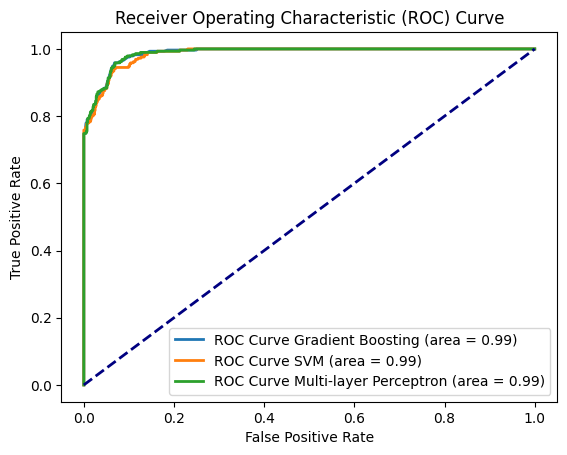

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


models = [final_model_gb, final_model_svc, final_model_mlp]
model_labels = ['Gradient Boosting', 'SVM', 'Multi-layer Perceptron']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_total, y_train_total, test_size=0.2, random_state=42)

# Create ROC curve for each model
plt.figure()
lw = 2

for model, label in zip(models, model_labels):
    try:
        # Try using predict_proba
        y_score = model.predict_proba(X_val)[:, 1]
    except AttributeError:
        # If predict_proba is not available, use decision_function
        y_score = model.decision_function(X_val)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_val, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=lw, label='ROC Curve {} (area = {:.2f})'.format(label, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
